# 6.0 - overall comparison

In this notebook I will analyse results of evaluation side by side.

There will be 3 models considered:

1. Baseline - BERT with masking words from dictionary (so called condBERT)
2. Final solution - Fine tuned T5 model
3. SOTA - recent work done by Skoltech lab using different dataset, but for the similar task.


In [1]:
import pandas as pd

baseline = pd.read_csv("../data/evaluations/bert.csv")
solution = pd.read_csv("../data/evaluations/t5_finetuned.csv")
sota = pd.read_csv("../data/evaluations/sota.csv")

# Toxicity of model output

This metric ranges from -1 as the most toxic to 1 as the most non-toxic.

As we see my solution using fine-tuned T5 model performes quite well, but still worse than SOTA.


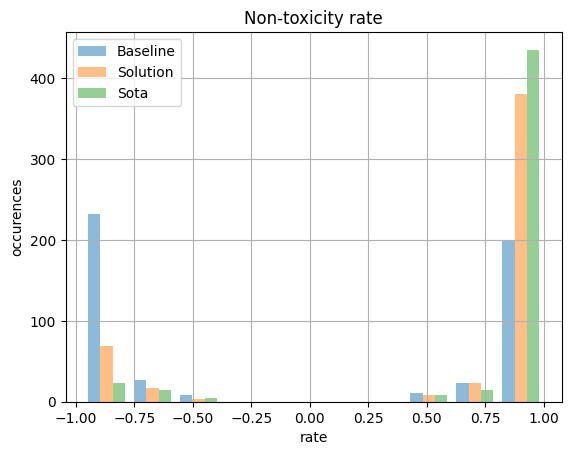

In [2]:
import sys
import matplotlib.pyplot as plt

# to be able to load modules from src
sys.path.append("..")

from src.visualization.utils import simple_hist

simple_hist(
    [baseline["rate"], solution["rate"], sota["rate"]],
    "Non-toxicity rate",
    "rate",
    "occurences",
    save_path="../reports/figures/overall-comparison.png",
    alpha=0.5,
    label=["Baseline", "Solution", "Sota"],
)


# BLEU metric

Observations:

1. Baseline has better BLEU score, but it is achieved by replacement of words without paraphrase (it saves most part of the sentence, probably losing some meaning)

2. SOTA model and my solution have comparable metric meaning they have similar quality of translation.


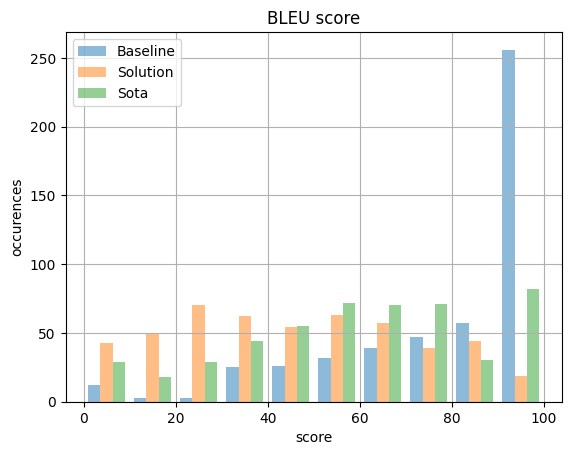

In [3]:
simple_hist(
    [baseline["bleu_score"], solution["bleu_score"], sota["bleu_score"]],
    "BLEU score",
    "score",
    "occurences",
    save_path="../reports/figures/overall-bleu.png",
    alpha=0.5,
    label=["Baseline", "Solution", "Sota"],
)